### 使用Kaggle给出的T-SEN进行词向量的可视化

In [1]:
import gensim
from gensim.models import Word2Vec

In [2]:
Word2Vec.load?

In [4]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

### 1. 导入之前在百度AI Studio训练好的模型

In [3]:
model = Word2Vec.load("E:/NLP/model/word2vector_wiki/wiki_corpus.model")

C:\Users\YJY\Anaconda3\lib\site-packages\smart_open\smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


### 2. 定义T-SEN函数并实现词向量的可视化

In [25]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []
    count = 0

    for word in model.wv.vocab:
        count += 1
        tokens.append(model[word])
        labels.append(word)
        if count > 1000: break
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    x_abs = []
    for value in new_values:
        x_abs.append(abs(value[0]))
        x.append(value[0])
        y.append(value[1])
    

    max_index = x_abs.index(max(x_abs))
    x.pop(max_index)
    y.pop(max_index)
    labels.pop(max_index)
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

### 3. 词向量的可视化结果（只选取了前1000个词向量）

C:\Users\YJY\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


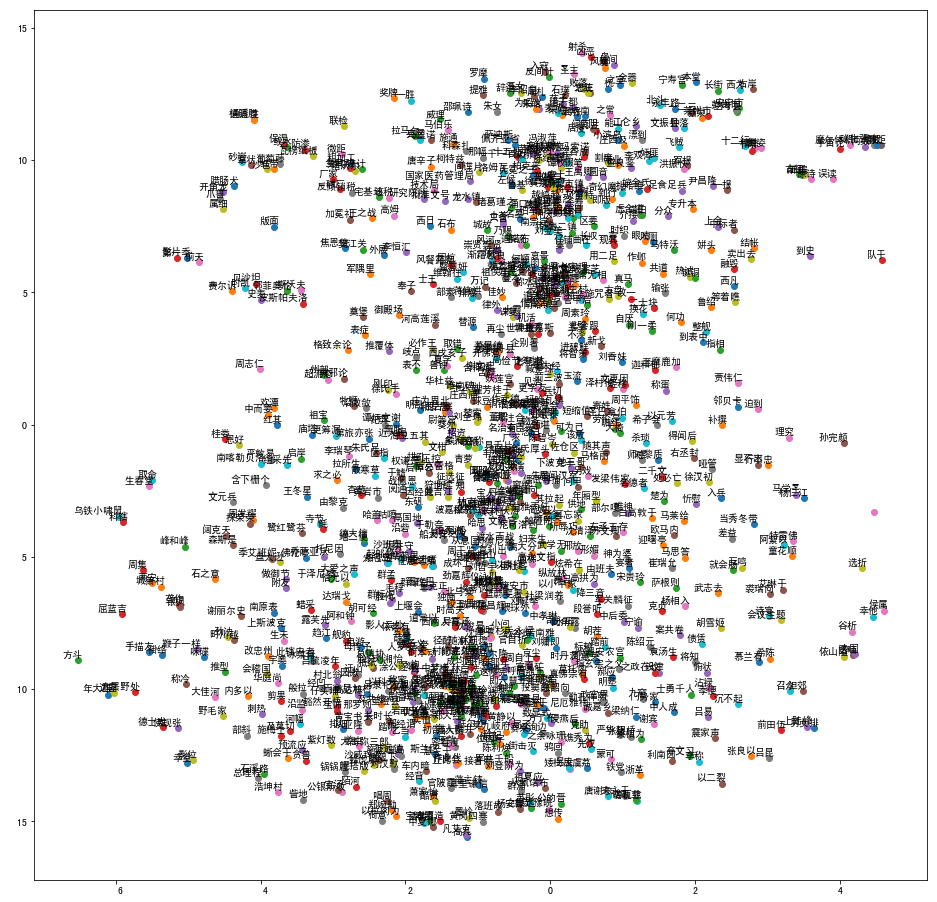

In [26]:
tsne_plot(model)